# DAT158 - End to end maskinlæringsprosjekt

## Frame the problem and look at the big picture

I dette maskinlæringsprosjektet skal vi vi utvikle og trene en modell til å predikere huspris i Californa. Notebooken vår er strukturert etter disse åtte punktene:

1. Frame the problem and look at the big picture
2. Get the data
3. Explore the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models and combine them into a great solution
7. Present your solution
8. Launch, monitor and maintain your system

## Get the data

In [1]:
# Importere nyttige libs
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Automatically reload modules defined in external files
%reload_ext autoreload
%autoreload 2

# Display plots directly in the notebook
%matplotlib inline

In [3]:
# Skriver ut dataen gitt til oss i oppgaven
import os
print(os.listdir("data"))

['sample_submission.csv', 'housing_data.csv', 'housing_test_data.csv']


In [4]:
# Bruker pandas til å lese filene

train = pd.read_csv('data/housing_data.csv')
test = pd.read_csv('data/housing_test_data.csv')
sampleSubmission = pd.read_csv('data/sample_submission.csv')

## Explore the data to gain insights

In [5]:
# For å se hvordan datasettet ser ut
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,INLAND
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,<1H OCEAN
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,<1H OCEAN
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,NEAR BAY


In [6]:
# For å se hvordan testsettet ser ut
test.head()

,Id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0,-122.27,37.87,35.0,3218.0,1108.0,1675.0,1000.0,1.7464,NEAR BAY
1,1,-118.94,34.18,24.0,3689.0,585.0,1898.0,581.0,5.9224,<1H OCEAN
2,2,-119.75,36.77,32.0,1962.0,399.0,1005.0,392.0,2.6726,INLAND
3,3,-118.34,33.93,32.0,1254.0,399.0,1281.0,386.0,2.2976,<1H OCEAN
4,4,-119.00,35.36,35.0,1021.0,280.0,1258.0,239.0,1.7375,INLAND


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16344 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


Her legger vi merke til at alle attributter er av typen float64 bortsett fra ocean_proximity, som er et object.

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 10 columns):
Id                    4128 non-null int64
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        4089 non-null float64
population            4128 non-null float64
households            4128 non-null float64
median_income         4128 non-null float64
ocean_proximity       4128 non-null object
dtypes: float64(8), int64(1), object(1)
memory usage: 322.6+ KB


In [9]:
train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.568763,35.630270,28.714571,2636.885841,537.999755,1425.131783,499.837936,3.871083,207262.390080
std,2.003747,2.137134,12.589203,2195.840228,422.944167,1126.453504,383.400473,1.909994,115838.329585
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1445.000000,295.000000,787.000000,279.000000,2.562500,120000.000000
50%,-118.490000,34.260000,29.000000,2122.500000,434.000000,1163.000000,409.000000,3.529450,180400.000000
75%,-118.010000,37.710000,37.000000,3137.000000,646.000000,1723.000000,603.000000,4.746450,265100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


Count viser antall celler med verdier under hver feature. Ettersom total_bedrooms kun viser 16344, og alle andre viser 16512 mangler det en del verdier under total_bedrooms.

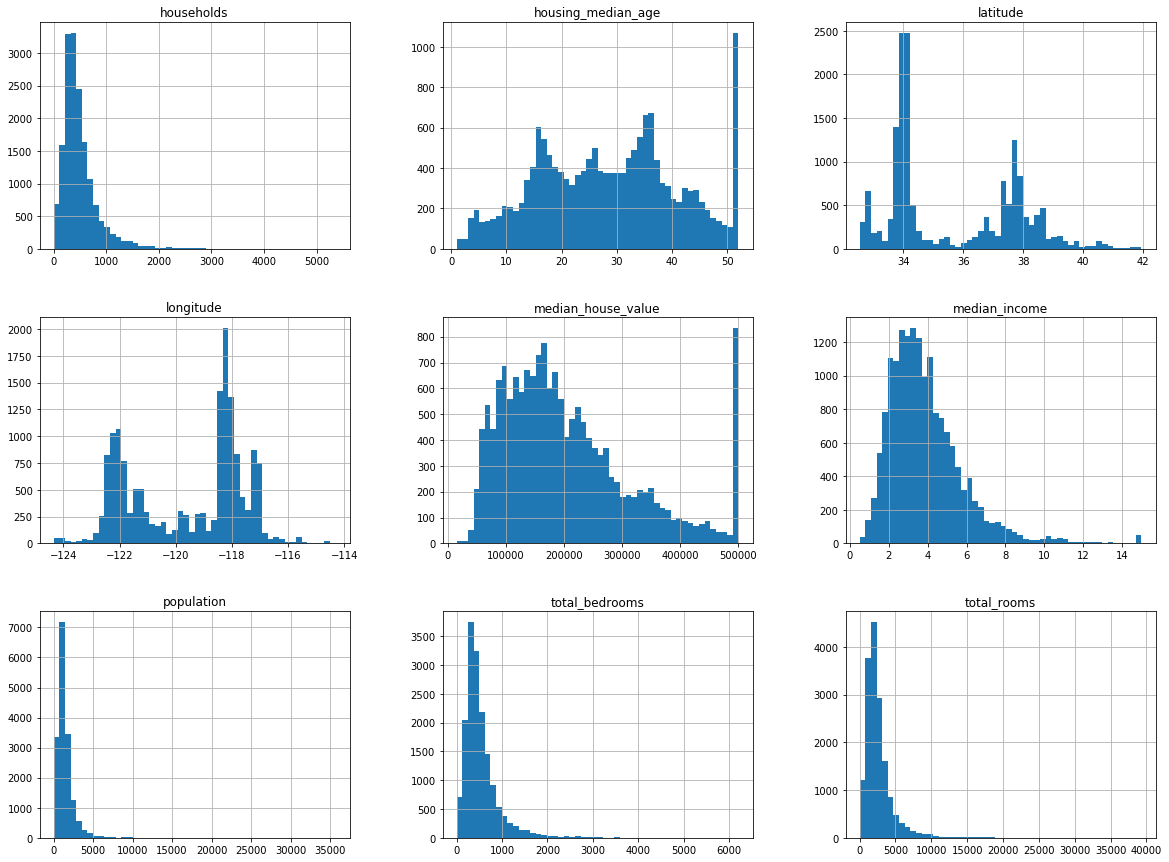

In [10]:
# Histogram er en fin måte å finne ut mer om dattasettet
train.hist(bins=50, figsize=(20,15))
plt.show()

La oss få et overblikk over husprisene og hvilke faktorer som påvirker prisen.

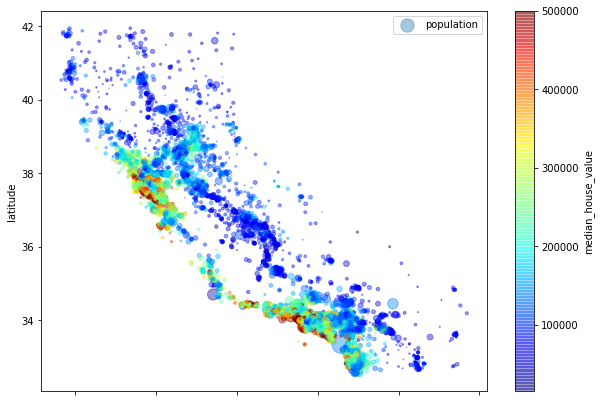

In [11]:
train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=train["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

Her ser vi at husprisene blant annet påvirkes av storbyene Los Angeles og San Francisco, samt beliggenhet i forhold til kysten.

## Prepare the data to better expose the underlying data patterns to machine learning algorithms

In [12]:
# Dropper median_house_value i treningssettet
housing = train.drop("median_house_value", axis=1)
housing_labels = train["median_house_value"].copy()

### Data cleaning

Maskinlæringsalgoritmer kan ikke kjøre med manglende verdier. Velger å bruke Simple imputer for å løse dette. Selv om total_bedrooms er den eneste som mangler verdier er det tryggere å kjøre imputer på alle numeriske attributter.

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Velger strategi for å fylle manglende verdier med medianen.

In [14]:
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num);

In [15]:
imputer.statistics_

array([-118.49   ,   34.26   ,   29.     , 2122.5    ,  434.     ,
       1163.     ,  409.     ,    3.52945])

Sjekker at dette blir det samme som når jeg beregner medianen manuelt.

In [16]:
housing_num.median().values

array([-118.49   ,   34.26   ,   29.     , 2122.5    ,  434.     ,
       1163.     ,  409.     ,    3.52945])

In [17]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)

In [18]:
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.568763,35.630270,28.714571,2636.885841,536.941618,1425.131783,499.837936,3.871083
std,2.003747,2.137134,12.589203,2195.840228,420.916349,1126.453504,383.400473,1.909994
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.790000,33.930000,18.000000,1445.000000,297.000000,787.000000,279.000000,2.562500
50%,-118.490000,34.260000,29.000000,2122.500000,434.000000,1163.000000,409.000000,3.529450
75%,-118.010000,37.710000,37.000000,3137.000000,643.000000,1723.000000,603.000000,4.746450
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


Som vi nå kan se er count på total_bedrooms endret til 16512, slik som alle andre.

### Handling Text and Categorical Attributes

De fleste maskinlæringsalgoritmer foretrekker at alle attributtene er numeriske. Siden ocean_proximity er teksbasert skal vi nå gjøre den numerisk.

In [19]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
0,NEAR BAY
1,INLAND
2,<1H OCEAN
3,<1H OCEAN
4,NEAR BAY
5,<1H OCEAN
6,INLAND
7,NEAR BAY
8,INLAND
9,INLAND


Bruker OneHotEncoder til å gjøre om tekstverdier til numeriske verdier.

In [20]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat = encoder.fit_transform(housing_cat)
housing_cat

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [21]:
housing_cat.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [22]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Feature Scaling

Maskinlæringsalgoritmer fungerer dårlig dersom variasjonen mellom verdiene i de ulike attributtene på treningssettet er store. Derfor lønner det seg å bruke StandardScaler for å skalere ned verdiene.

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
housing_to_scale = housing.drop("ocean_proximity", axis=1)
scaler.fit_transform(housing_to_scale)

array([[-1.27826235e+00,  9.54452043e-01,  8.96464280e-01, ...,
        -4.53766853e-01, -4.76899446e-01, -1.82377323e-03],
       [-7.04320194e-01,  9.45093431e-01,  8.96464280e-01, ...,
        -1.12492007e+00, -1.13941217e+00,  1.83933698e+00],
       [ 5.98278964e-01, -8.23684256e-01, -4.53940127e-01, ...,
        -4.74185535e-01, -3.75175051e-01,  1.41597210e+00],
       ...,
       [ 9.37653457e-01, -9.59384131e-01, -1.88378009e+00, ...,
         1.28892331e+00,  1.25763190e+00,  1.90928695e+00],
       [ 1.13229471e+00, -7.16060217e-01,  1.61138426e+00, ...,
        -1.19771711e+00, -1.26982806e+00, -6.85144943e-01],
       [-1.09859350e+00,  1.10418984e+00, -1.96321564e+00, ...,
         8.91202889e-01,  5.63819362e-01,  8.21920918e-01]])

Her kan vi se hvordan resultatet av StandardScaling ble.

### Transformation Pipelines

For å gjøre om treningssettet vårt i riktig rekkefølge bruker vi Pipelines. Lager først en pipeline for data cleaning og feature scaling.

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [26]:
housing_num_tr

array([[-1.27826235e+00,  9.54452043e-01,  8.96464280e-01, ...,
        -4.53766853e-01, -4.76899446e-01, -1.82377323e-03],
       [-7.04320194e-01,  9.45093431e-01,  8.96464280e-01, ...,
        -1.12492007e+00, -1.13941217e+00,  1.83933698e+00],
       [ 5.98278964e-01, -8.23684256e-01, -4.53940127e-01, ...,
        -4.74185535e-01, -3.75175051e-01,  1.41597210e+00],
       ...,
       [ 9.37653457e-01, -9.59384131e-01, -1.88378009e+00, ...,
         1.28892331e+00,  1.25763190e+00,  1.90928695e+00],
       [ 1.13229471e+00, -7.16060217e-01,  1.61138426e+00, ...,
        -1.19771711e+00, -1.26982806e+00, -6.85144943e-01],
       [-1.09859350e+00,  1.10418984e+00, -1.96321564e+00, ...,
         8.91202889e-01,  5.63819362e-01,  8.21920918e-01]])

Lager nå en ny pipeline for å sette sammen numerisk ocean_proximity med resten av treningsettet.

In [27]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])

housing_prepared = full_pipeline.fit_transform(housing)

In [28]:
# Omgjort og klar treningssett
housing_prepared

array([[-1.27826235,  0.95445204,  0.89646428, ...,  0.        ,
         1.        ,  0.        ],
       [-0.70432019,  0.94509343,  0.89646428, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.59827896, -0.82368426, -0.45394013, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.93765346, -0.95938413, -1.88378009, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.13229471, -0.71606022,  1.61138426, ...,  0.        ,
         0.        ,  0.        ],
       [-1.0985935 ,  1.10418984, -1.96321564, ...,  0.        ,
         0.        ,  0.        ]])

## Explore many different models and short-list the best ones

### Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()
lr.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lr.predict(some_data_prepared))

Predictions: [238013.56774804 305538.77230536 329666.03554829 358581.25301559
 209993.80908641]


Hvis vi sammenligner prediksjonene med testsettet er resultatet dårlig. Det er store avvikt mellom verdiene.

In [32]:
print("Labels:", list(some_labels))

Labels: [184000.0, 172200.0, 359900.0, 258200.0, 239100.0]


### Decision Tree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(housing_prepared, housing_labels)
print("Predictions:", dtr.predict(some_data_prepared))

Predictions: [184000. 172200. 359900. 258200. 239100.]


Når vi ser på resultatet denne gangen ser vi at resultatet blir prikk likt. Dette er et tegn på en "overfitted model". For å finne ut om denne modellen er god eller ikke må vi splitte treningssettet inn i et mindre treningssett og et valideringssett. Bruker cross_val_score til å finne en score på decision tree regressor modellen.

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtr, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [35]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [68754.20227735 71215.76203107 72047.72528852 72523.8660251
 73268.59405326 68530.55975809 65658.29729217 66495.4292526
 68597.48858653 66337.88091198]
Mean: 69342.98054766856
Standard deviation: 2619.7316076338534


Her blir resultatet en dårlig score. Det vil si at heller ikke denne modellen er særlig gunstig.

### Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(housing_prepared, housing_labels)
print("Predictions:", rfr.predict(some_data_prepared))

/Users/morten/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Predictions: [181740.  172200.  347090.  327750.2 264290. ]


In [37]:
print("Labels:", list(some_labels))

Labels: [184000.0, 172200.0, 359900.0, 258200.0, 239100.0]


Disse prediksjonene ser lovende ut. Vi har litt avvik, men dette er den beste modellen.

## Fine-tune your models and combine them into a great solution

Sjekker score med kryssvalidering på Random Forest Regressor.

In [38]:
scores = cross_val_score(rfr, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(forest_rmse_scores)

Scores: [52072.55864518 52267.68526978 52689.46765382 51328.98290952
 53787.65471327 51906.29159426 51332.68822729 49898.51427559
 56399.94713784 51465.24720109]
Mean: 52314.90376276619
Standard deviation: 1665.0056818779242


Her har vi en god score, men vi undersøker muligheten for å få en bedre modell. Til det bruker vi GridSearch.

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [10, 50, 100], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [10, 50], 'max_features': [2, 4, 6]},
]

rfr = RandomForestRegressor()

grid_search = GridSearchCV(rfr, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels);

In [40]:
# Vis parametre for best resultat
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 50}

In [41]:
model = grid_search.best_estimator_
model

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Sjekker score med kryssvalidering på nytt etter GridSearch.

In [42]:
scores = cross_val_score(model, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(forest_rmse_scores)

Scores: [49799.0690051  47671.39847364 48571.20137898 48882.77291018
 50424.12672868 47733.03461921 49021.40553972 45670.69605365
 53222.68771405 47868.27885193]
Mean: 48886.4671275158
Standard deviation: 1905.317613274363


Denne modellen blir vår løsning. Nå kan vi evaluere modellen vår på testsettet.

In [43]:
test_prepared = full_pipeline.transform(test)
median_house_value = model.predict(test_prepared)
median_house_value

array([234472.02, 260978.  ,  72052.  , ..., 103536.  , 356822.12,
       155610.02])

## Present your solution

Nå som modellen vår er klar er det på tide å se tilbake på hva vi har lært. Vi har blant annet lært at beliggenheten til husene i forhold til kysten og storbyene Los Angeles og San Francisco. I tillegg har vi lært at selv om en modell ser lovende ut til å begynne med kan det hende det er en "overfitted model". Med kryssvalidering lærte vi at en "overfitted model" viste seg til å ikke være en god løsning i det hele tatt.

I punkt 5 utforsket vi flere modeller fant ut hvilke som funket, og hvilke som ikke funket. Den første vi utforsket var linear regression. Vi fant fort ut at denne modellen fungerte dårlig til vårt prosjekt. Neste modell var Decision Tree Regressor. Denne viste seg å være en "overfitted model". Derfor fungerte også denne modellen dårlig til vårt prosjekt. Siste modell vi utforsket var Random Forest Regressor. Denne modellen fikk god score på våre tester og vi kunne konkludere med at denne fungerer bra til prosjektet vårt.

Selv om modellen vår er finjustert til å fungere best mulig har den likevel noen begrensninger. Modellen kan aldri bli helt perfekt og det vil alltid være noen avvik. Siden boligmarkedet stadig er i utvikling har modellen vår også noe begrensninger der. Boligmarkedet er veldig uforutsigbart. Derfor vil det bli vanskelig å opprettholde en treffsikker modell.

## Launch, monitor and maintain your system

Nå er modellen vår ferdig og vi kan kjøre den på testsettet. Uten å vite prisene vi faktisk sammenligner med vet vi ikke hvor nærmt vi er, men vi baserer oss på Kaggle scoren. Vi har vært i stand til å lage en maskinlæringsmodell som ikke helt enda kan konkurrere med den manuelle vurderingen, men som kan med jevnlig trening bli mer presis.

Hadde datasettet vært et noe vi jevnlig hadde fått inn nye data på, måtte vi (som overskriften sier) overvåket tallene slik at man trener modellen til å bli best mulig. Over tid kan for eksempel en faktor påvirke median_house_value mer enn det den gjør i dag. Overvåkning er også viktig for å forhindre at man får inn vilkårlige/gale verdier som i sin helhet kan ha stor innvirkning på resultatet.

### Submission

In [44]:
# Ønsket format på innlevering
sampleSubmission.head()

,Id,median_house_value
0,0,178050.0
1,1,178050.0
2,2,178050.0
3,3,178050.0
4,4,178050.0


In [45]:
submission = pd.DataFrame({'Id': test['Id'], 'median_house_value': median_house_value})
submission.head()

,Id,median_house_value
0,0,234472.02
1,1,260978.00
2,2,72052.00
3,3,167106.00
4,4,50710.00


Slik ser vår innlevering ut i ønsket format.

In [46]:
# Stores a csv file to submit to the kaggle competition
submission.to_csv('submission5.csv', index=False)